In [ ]:
from google.colab import files

# files.upload()

In [ ]:
# # Make kaggle directory
# !mkdir -p ~/.kaggle

# # Copy kaggle.json ke direktori
# !cp kaggle.json ~/.kaggle/

# # Give access to file
# !chmod 600 ~/.kaggle/kaggle.json

# # Download via API
# !kaggle datasets download -d austinreese/craigslist-carstrucks-data

# # Automatic overwrite
# !unzip -o craigslist-carstrucks-data.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
pd.set_option('display.max_columns', None)

print("Library imported successfully.")

Library imported successfully.


**Dataset**

Dataset ini merupakan kumpulan data kendaraan yang diambil dari situs iklan jual-beli mobil (seperti Craigslist). Dataset berisi informasi tentang berbagai kendaraan yang dijual, termasuk manufaktur, tahun produksi, kondisi, jarak tempuh, lokasi, serta harga jual.

Tujuan umum penggunaan dataset ini adalah:

Menganalisis faktor-faktor yang mempengaruhi harga kendaraan

Membangun model prediksi harga (regression model)

Melihat pola pasar kendaraan bekas dari berbagai wilayah di Amerika Serikat

Dataset ini sangat kaya fitur dan cukup besar (lebih dari 426 ribu entri), cocok untuk membangun model Machine Learning.

In [ ]:
df = pd.read_csv('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
print('\n--- dtypes ---')
print(df.dtypes)

df.head()


--- dtypes ---
id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
display(df.describe())

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


**Data Cleaning**

In [ ]:
# Drop kolom yang tidak perlu untuk prediksi harga (VIN, id, url tdk mempengaruhi harga mesin)
df_clean = df.drop(columns=['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'region'], errors='ignore')

# Hapus Missing Values
df_clean = df_clean.dropna(subset=['year', 'price', 'odometer'])

# Isi dgn 'unknown'
cat_cols = df_clean.select_dtypes(include='object').columns
for col in cat_cols:
    df_clean[col] = df_clean[col].fillna('unknown')

# Kasih batas
# Harga: Mobil bekas di bawah $1000 biasanya sudah sangat jelek, di atas $100k jg jarang
# Odometer: Di atas 300k miles data error / mobil sangat tua
# Ambil mobil diatas 1990 saja
df_clean = df_clean[
    (df_clean['price'] > 1000) &
    (df_clean['price'] < 100000) &
    (df_clean['odometer'] < 300000) &
    (df_clean['year'] > 1990)
]

# Feature Engineering
# Hitung umur pemakaian mobil
current_year = 2025
df_clean['vehicle_age'] = current_year - df_clean['year']

# Cmn ambil top 20 manufacturer, sisanya dibuat 'Other')
top_20_manuf = df_clean['manufacturer'].value_counts().nlargest(20).index
df_clean['manufacturer'] = df_clean['manufacturer'].apply(lambda x: x if x in top_20_manuf else 'other')

# Drop kolom 'year' karena sudah ada 'vehicle_age' redundant
df_clean = df_clean.drop(columns=['year', 'model'], errors='ignore')

print(f"Ukuran data setelah cleaning: {df_clean.shape}")
display(df_clean.head())

Ukuran data setelah cleaning: (360978, 15)


,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date,vehicle_age
27,33590,gmc,good,8 cylinders,gas,57923.0,clean,other,unknown,unknown,pickup,white,al,2021-05-04T12:31:18-0500,11.0
28,22590,chevrolet,good,8 cylinders,gas,71229.0,clean,other,unknown,unknown,pickup,blue,al,2021-05-04T12:31:08-0500,15.0
29,39590,chevrolet,good,8 cylinders,gas,19160.0,clean,other,unknown,unknown,pickup,red,al,2021-05-04T12:31:25-0500,5.0
30,30990,toyota,good,8 cylinders,gas,41124.0,clean,other,unknown,unknown,pickup,red,al,2021-05-04T10:41:31-0500,8.0
31,15000,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,2021-05-03T14:02:03-0500,12.0


In [ ]:
print(f"\nJumlah baris duplikat ditemukan: {df_clean.duplicated().sum()}")
df_cleaned = df_clean.drop_duplicates()

print(f"Jumlah total baris sekarang: {df_cleaned.shape[0]}")


Jumlah baris duplikat ditemukan: 468
Jumlah total baris sekarang: 360510


**EDA**

Data harga mobil memiliki distribusi right-skewed, yang artinya mayoritas mobil bekas dijual dengan harga rendah (di bawah $40.000), sementara mobil dengan harga sangat tinggi jumlahnya sedikit.

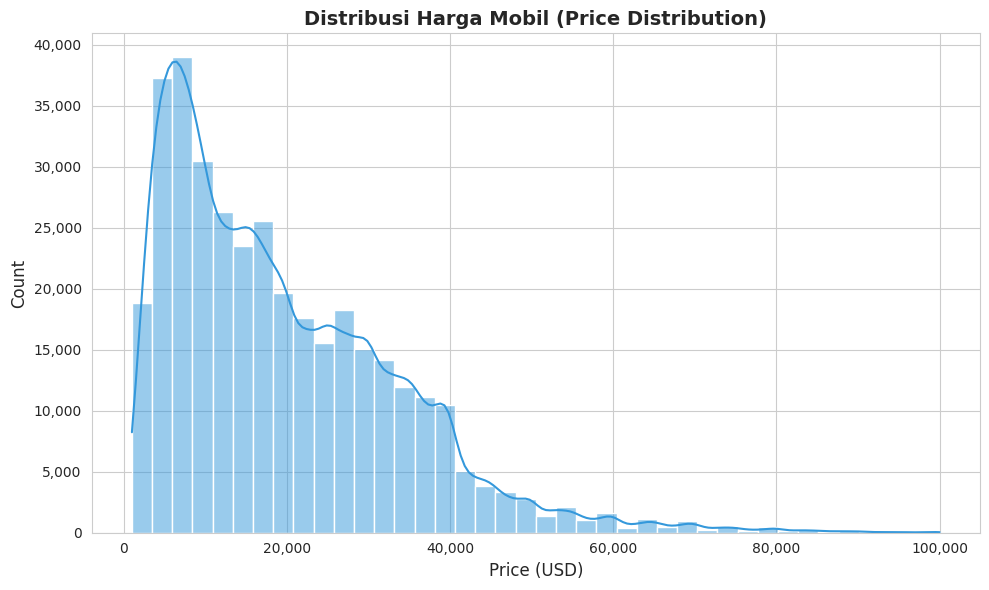

In [ ]:
# Distribusi Harga Mobil
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df_clean['price'], kde=True, color='#3498db', bins=40, ax=ax)

ax.set_title('Distribusi Harga Mobil (Price Distribution)', fontweight='bold')
ax.set_xlabel('Price (USD)')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

Semakin tinggi angka kilometer (odometer), harga jual mobil semakin menurun. Penurunan harga terlihat paling tajam pada mobil dengan jarak tempuh rendah hingga menengah, lalu cenderung melandai (stabil di harga rendah) ketika jarak tempuh melebihi 150.000 mil.

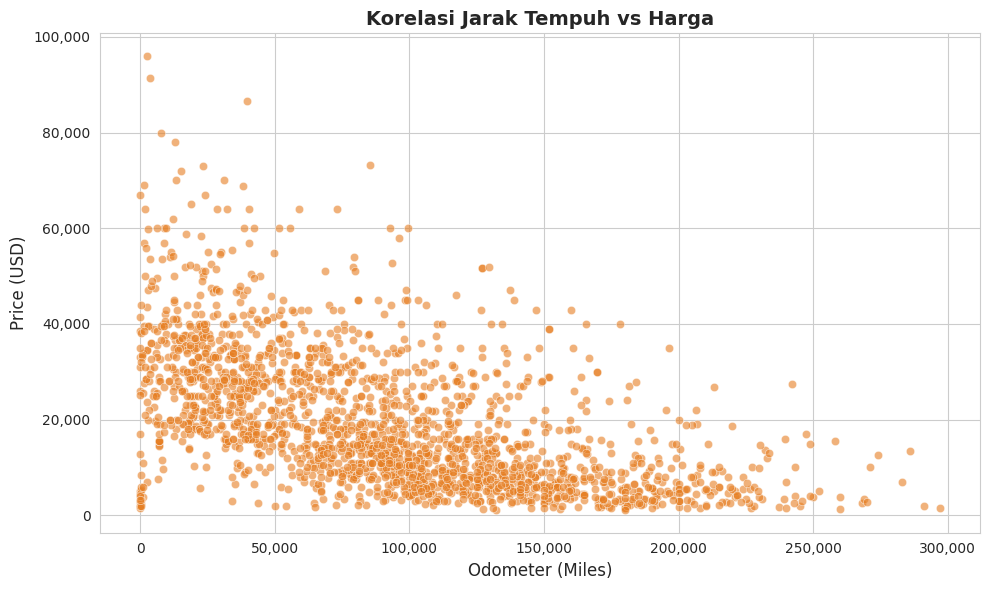

In [ ]:
# Odometer vs Price
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=df_clean.sample(2000, random_state=42),
                x='odometer', y='price',
                alpha=0.6, color='#e67e22', ax=ax)

ax.set_title('Korelasi Jarak Tempuh vs Harga', fontweight='bold')
ax.set_xlabel('Odometer (Miles)')
ax.set_ylabel('Price (USD)')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

Perbedaan segmen pasar yang jelas antar pabrikan. Merek yang identik dengan kendaraan tipe truk/SUV seperti Ram dan GMC memiliki median harga tertinggi, sedangkan merek-merek ekonomis seperti Honda, Kia, dan Hyundai konsisten berada di rentang harga terendah

/tmp/ipython-input-2268327709.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top15, x='price', y='manufacturer', order=order_manuf, palette='viridis')


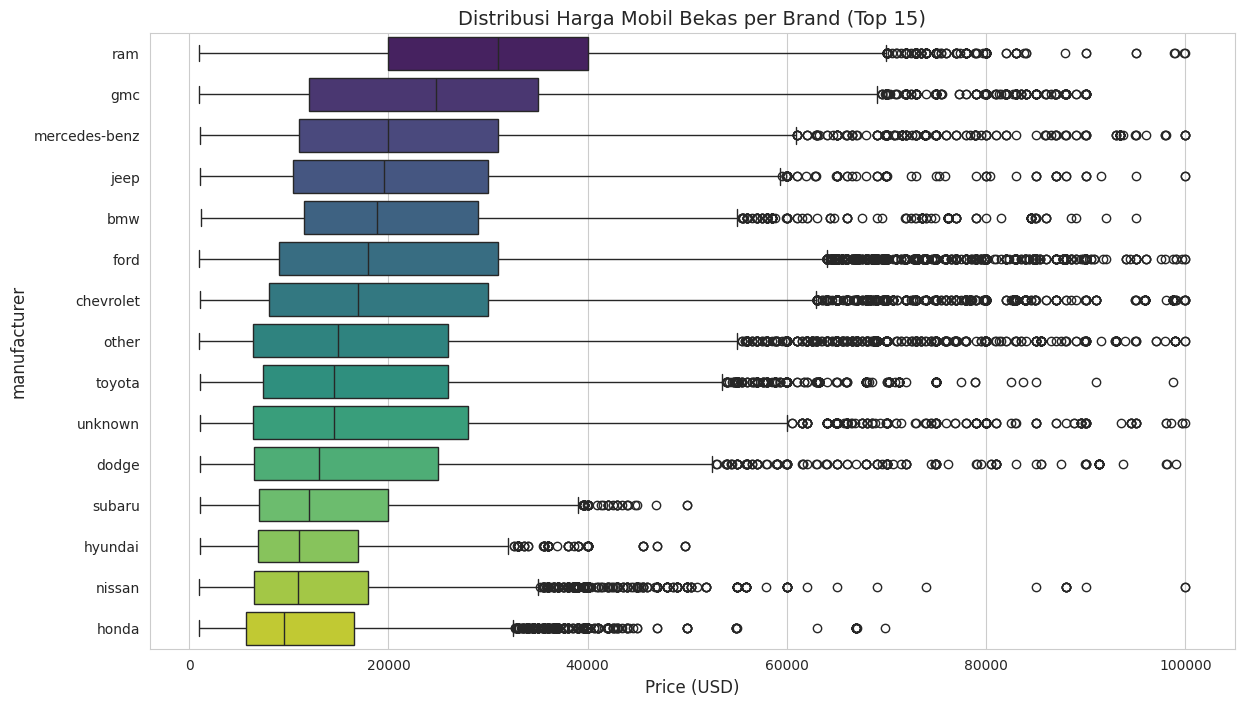

In [ ]:
# Distribusi Harga per Manufacturer (Top 15)
plt.figure(figsize=(14, 8))

# Ambil 15 merek mobil terbanyak datanya
top_15_manuf = df_cleaned['manufacturer'].value_counts().nlargest(15).index
df_top15 = df_cleaned[df_cleaned['manufacturer'].isin(top_15_manuf)]

order_manuf = df_top15.groupby('manufacturer')['price'].median().sort_values(ascending=False).index

sns.boxplot(data=df_top15, x='price', y='manufacturer', order=order_manuf, palette='viridis')
plt.title('Distribusi Harga Mobil Bekas per Brand (Top 15)')
plt.xlabel('Price (USD)')
plt.show()

Harga memiliki korelasi negatif yang cukup kuat terhadap odometer (-0.63) dan umur kendaraan (-0.61). Artinya, jarak tempuh dan usia mobil adalah faktor utama yang menurunkan harga jual.

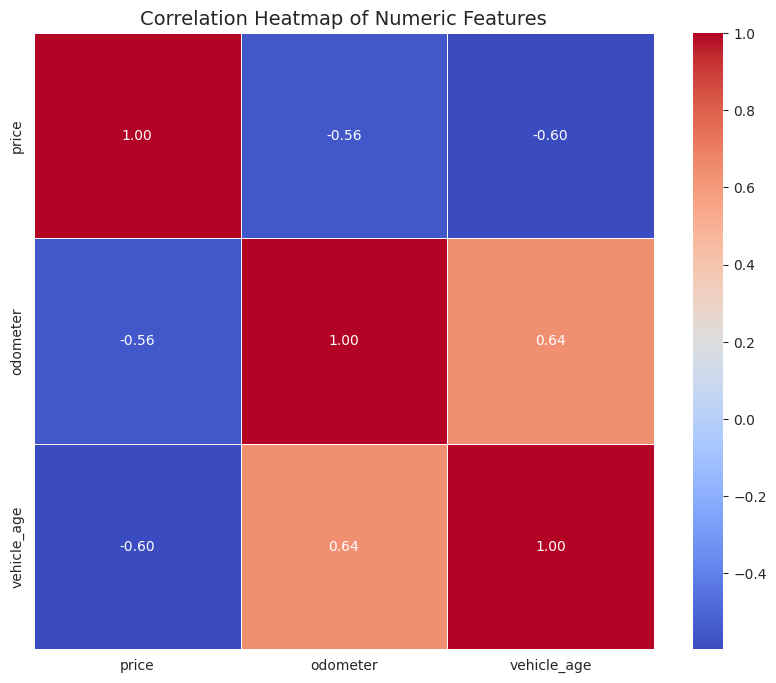

In [ ]:
# Heatmap Korelasi (numerik)
plt.figure(figsize=(10, 8))

# Amnil kolom yang bertipe angka saja
numeric_df = df_cleaned.select_dtypes(include=[np.number])
correlation = numeric_df.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

Semakin tua usia kendaraan, harga jualnya menurun secara konsisten, seperti yang ditunjukkan oleh garis tren merah yang bergerak turun

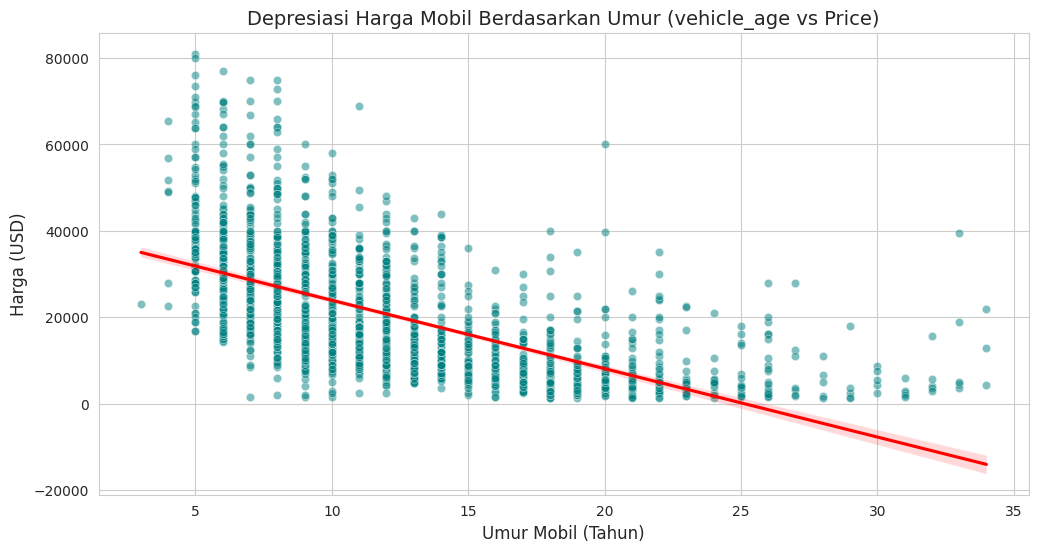

In [ ]:
# Analisis Depresiasi Harga Mobil berdasarkan Umur
age_col = 'vehicle_age'
plt.figure(figsize=(12, 6))
sample_data = df_cleaned.sample(min(2000, len(df_cleaned)), random_state=42)
sns.scatterplot(data=sample_data, x=age_col, y='price', alpha=0.5, color='teal')

# Garis tren (Regression line)
sns.regplot(data=sample_data, x=age_col, y='price', scatter=False, color='red')

plt.title(f'Depresiasi Harga Mobil Berdasarkan Umur ({age_col} vs Price)')
plt.xlabel('Umur Mobil (Tahun)')
plt.ylabel('Harga (USD)')
plt.show()

FWD (Front-Wheel Drive) merupakan kategori paling ekonomis, dengan distribusi harga yang padat di angka rendah (median paling kecil).

4WD (Four-Wheel Drive) memiliki median harga tertinggi, yang wajar karena biasanya terdapat pada truk atau SUV yang lebih mahal.

RWD (Rear-Wheel Drive) memiliki sebaran yang sangat luas hingga ke harga ekstrem tinggi (kemungkinan mobil sport atau luxury), meskipun mediannya sedikit di bawah 4WD.

/tmp/ipython-input-2583866924.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='drive', y='price', inner='quartile', palette='muted')


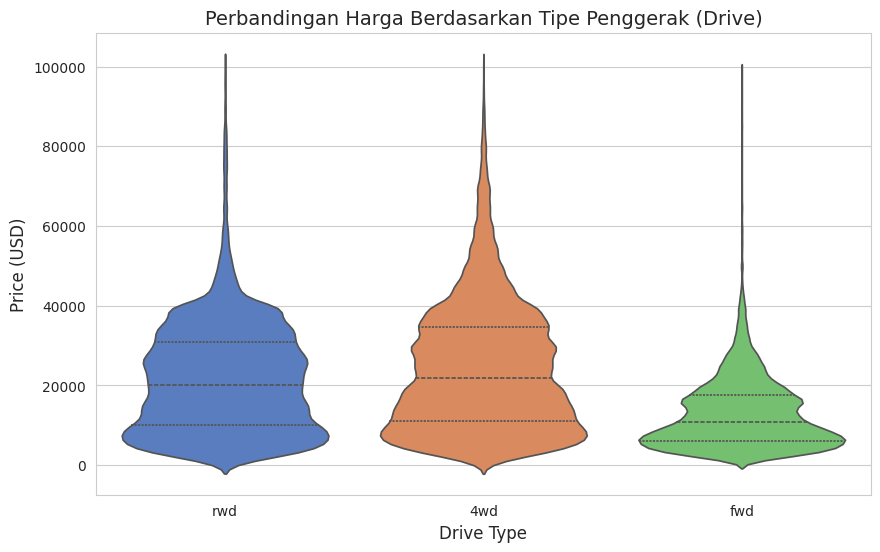

In [ ]:
# Drive Type vs Price
plt.figure(figsize=(10, 6))


df_clean = df_cleaned[df_cleaned['drive'] != 'unknown']

sns.violinplot(data=df_clean, x='drive', y='price', inner='quartile', palette='muted')
plt.title('Perbandingan Harga Berdasarkan Tipe Penggerak (Drive)')
plt.xlabel('Drive Type')
plt.ylabel('Price (USD)')
plt.show()

In [ ]:
# Pisahkan Fitur (X) dan Target (y)
X = df_clean.drop('price', axis=1)
y = df_clean['price']

# LOG TRANSFORM pada Target
# Mengubah range harga 1,000 - 100,000 menjadi skala logaritma (misal: 6.9 - 11.5)
y_log = np.log1p(y)

# Split Data = 80% Train, 20% Test
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

print("Data berhasil dipisah dan target di-transformasi log.")

Data berhasil dipisah dan target di-transformasi log.


Modeling

In [ ]:
# Tentukan kolom numerik dan kategorikal
numeric_features = ['odometer', 'vehicle_age']
categorical_features = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']

# Preprocessing Pipeline
# Numeric: StandardScaler (agar skala odometer dan umur setara)
# Categorical: OneHotEncoder (mengubah teks menjadi angka biner)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Model: Random Forest Regressor
# Kita batasi n_estimators dan max_depth agar training tidak terlalu lama di Colab
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=20, n_jobs=-1, random_state=42))
])

# Training
print("Sedang melatih model...")
model_pipeline.fit(X_train, y_train_log)
print("Training Selesai.")

Sedang melatih model...
Training Selesai.


In [ ]:
# Ubah prediksi ke skala Log
y_pred_log = model_pipeline.predict(X_test)

# Kembalikan ke skala harga asli (Inverse Log / Exponent)
y_test_original = np.expm1(y_test_log)
y_pred_original = np.expm1(y_pred_log)

# Buat menghitung Metrik
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print("="*30)
print(" HASIL EVALUASI MODEL ")
print("="*30)
print(f"R2 Score (Akurasi) : {r2:.4f}")
print(f"MAE (Mean Abs Error): ${mae:,.2f} (Rata-rata kesalahan prediksi dalam USD)")
print(f"RMSE (Root Mean Sq): ${rmse:,.2f}")
print("="*30)

 HASIL EVALUASI MODEL 
R2 Score (Akurasi) : 0.9063
MAE (Mean Abs Error): $2,491.35 (Rata-rata kesalahan prediksi dalam USD)
RMSE (Root Mean Sq): $4,415.25


In [ ]:
# 1. Buat DataFrame Hasil (Gabungkan Aktual, Prediksi, dan Residual)
res_df = pd.DataFrame({
    'Actual': y_test_original,
    'Predicted': y_pred_original
})
res_df['Residuals'] = res_df['Actual'] - res_df['Predicted']
res_df['Abs_Error'] = res_df['Residuals'].abs()

# 2. Gabungkan dengan data kondisi mobil dari X_test
X_test_reset = X_test.reset_index(drop=True)
if 'condition' in X_test_reset.columns:
    res_df = pd.concat([res_df, X_test_reset[['condition']]], axis=1)
else:
    res_df['condition'] = 'Unknown'

# 3. Ekstrak Feature Importance dari Pipeline
# Mengambil model Random Forest dari dalam pipeline
rf_model = model_pipeline.named_steps['regressor']
# Mengambil preprocessor
preprocessor_step = model_pipeline.named_steps['preprocessor']

# Ambil nama fitur kategori setelah OneHotEncoder
cat_names = preprocessor_step.named_transformers_['cat'].get_feature_names_out(categorical_features)
# Gabungkan dengan nama fitur numerik
feature_names = np.r_[numeric_features, cat_names]
importances = rf_model.feature_importances_

# Buat DataFrame Feature Importance (Top 10)
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(10)


/tmp/ipython-input-3423417453.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature', palette='magma', ax=ax3)
/tmp/ipython-input-3423417453.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=res_df[res_df['condition'].isin(valid_conds)],
/tmp/ipython-input-3423417453.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_err_brand.values, y=avg_err_brand.index, palette='viridis', ax=ax6)


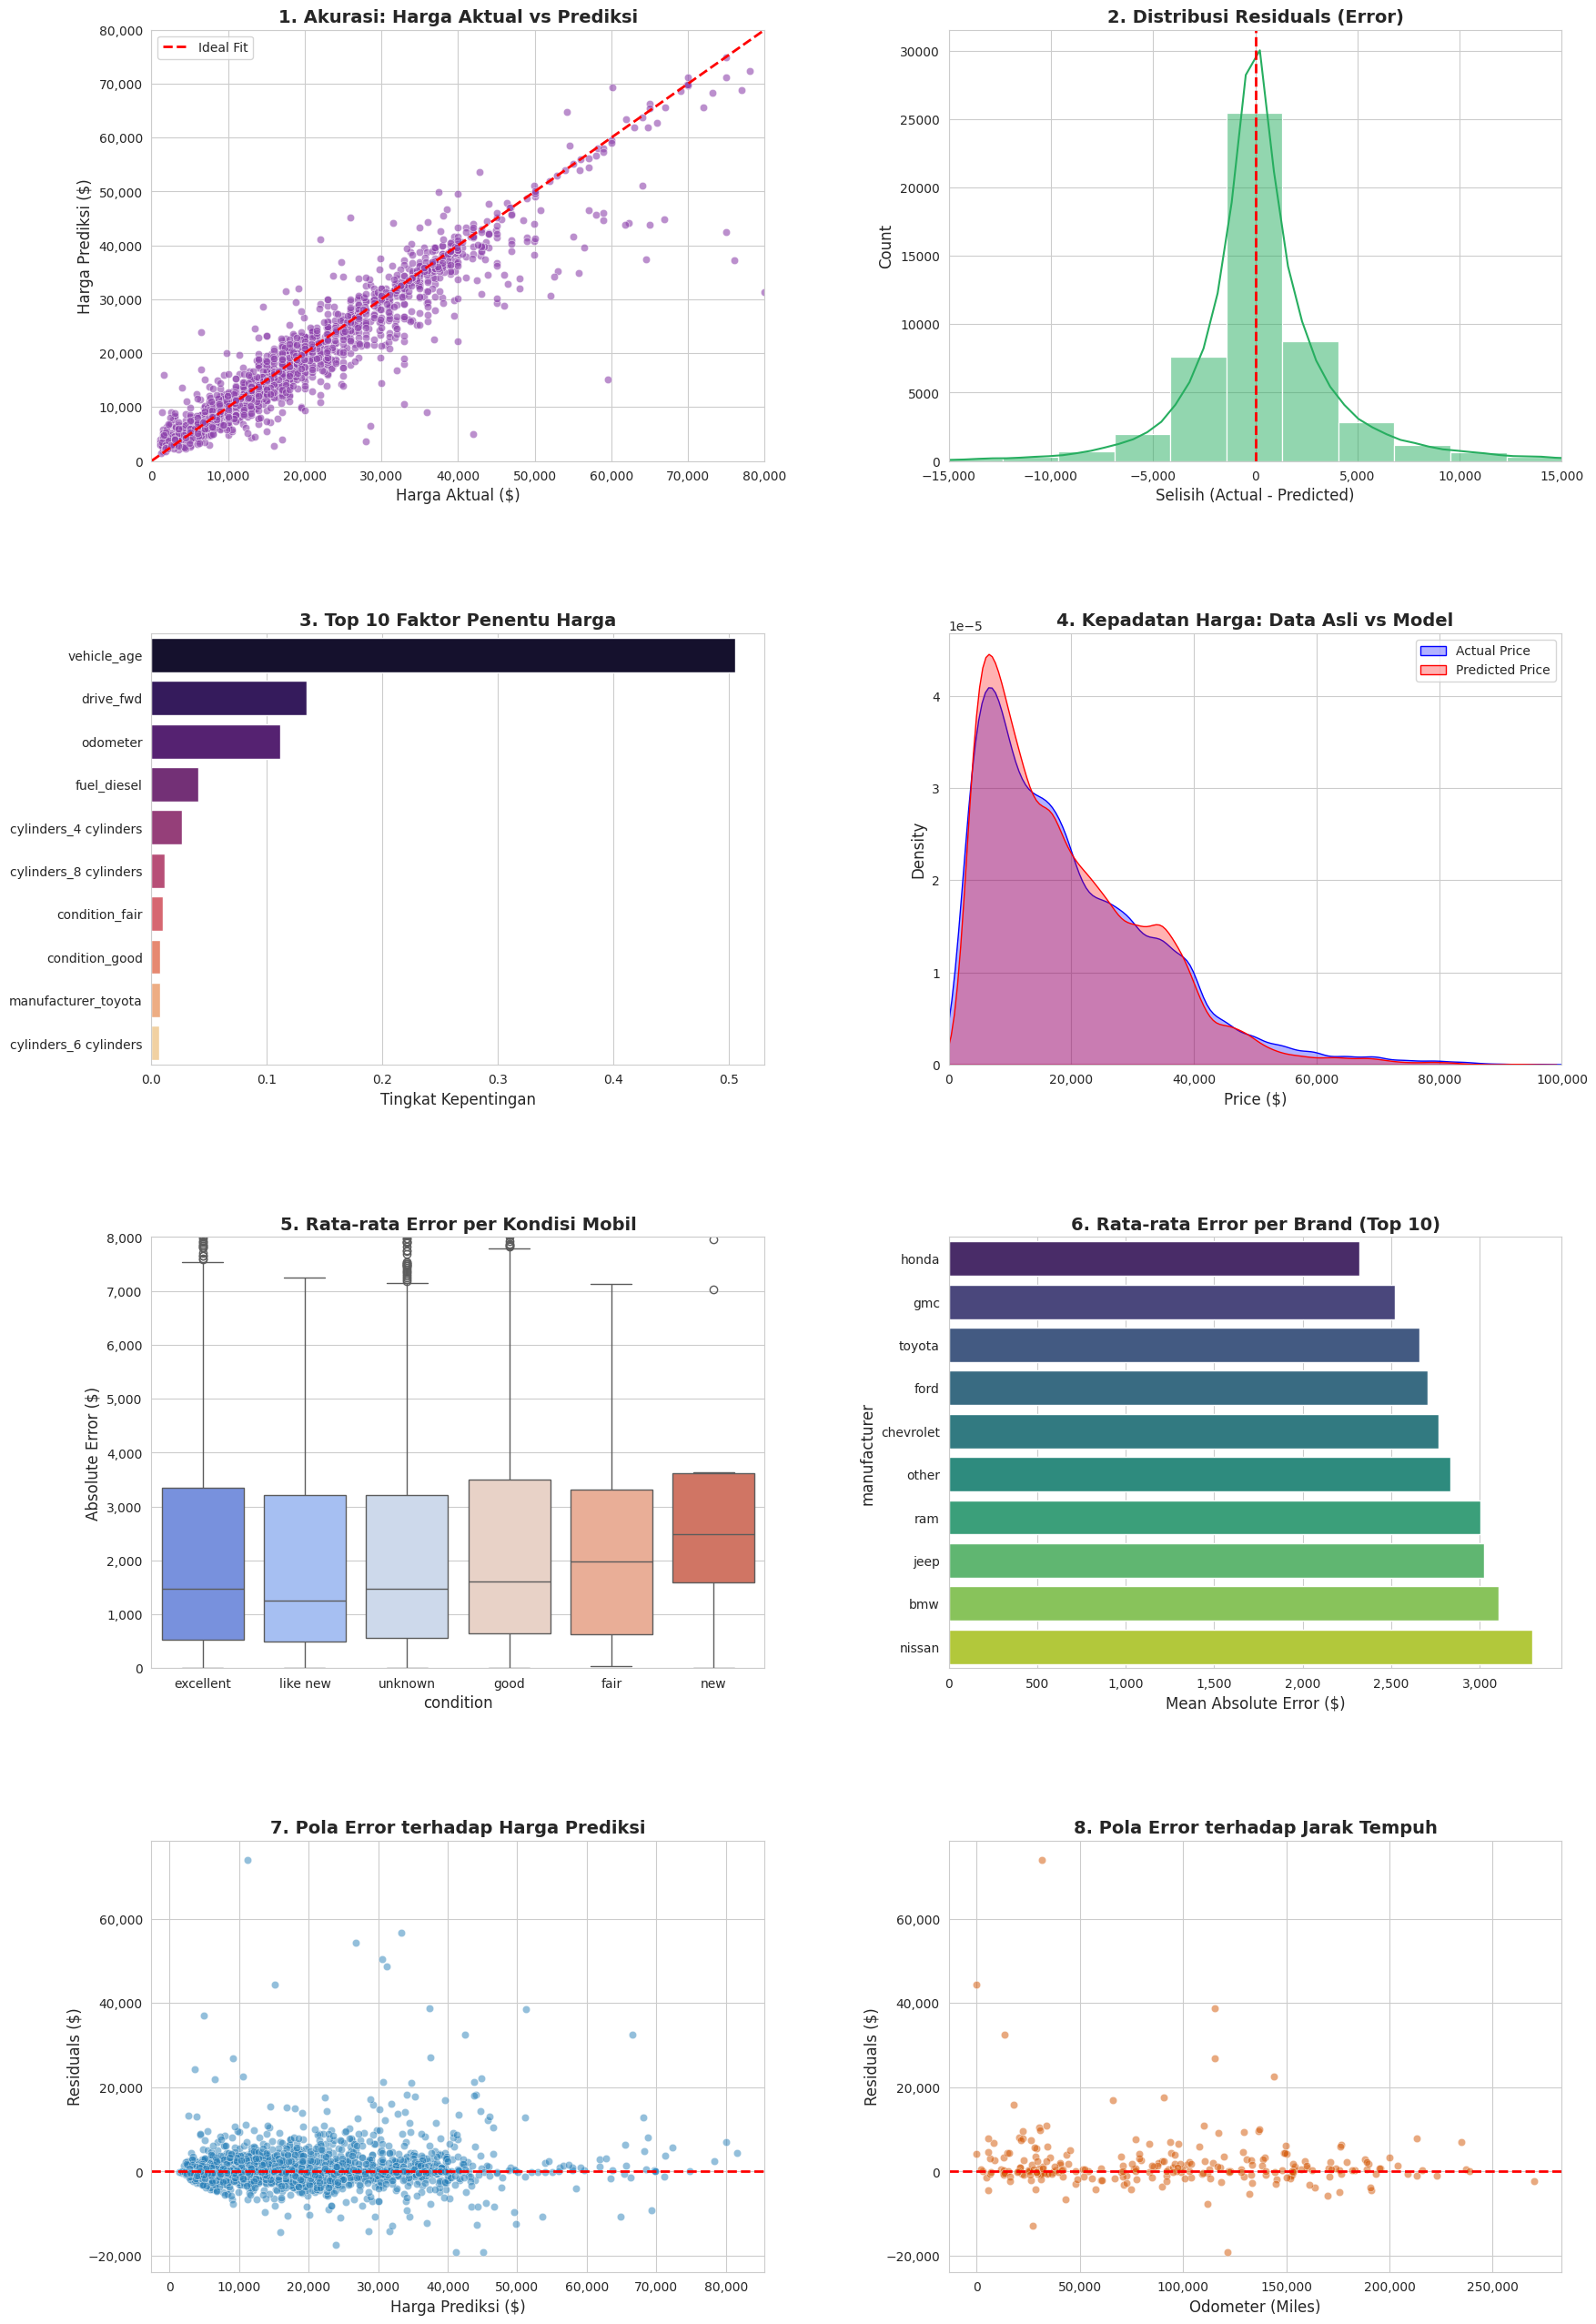

In [37]:
res_df = pd.DataFrame({
    'Actual': y_test_original,
    'Predicted': y_pred_original
})
res_df['Residuals'] = res_df['Actual'] - res_df['Predicted']
res_df['Abs_Error'] = res_df['Residuals'].abs()

X_test_reset = X_test.reset_index(drop=True)

cols_to_add = ['condition', 'manufacturer', 'odometer']
for col in cols_to_add:
    if col in X_test_reset.columns:
        res_df[col] = X_test_reset[col]
    else:
        res_df[col] = 'Unknown'

fig = plt.figure(figsize=(20, 32))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Actual vs Predicted (Scatter)
ax1 = plt.subplot(4, 2, 1)
plot_data = res_df.sample(min(2000, len(res_df)), random_state=42)
sns.scatterplot(data=plot_data, x='Actual', y='Predicted', alpha=0.6, color='#8e44ad', ax=ax1)
# Garis ideal
max_val = 80000
ax1.plot([0, max_val], [0, max_val], 'r--', lw=2, label='Ideal Fit')
ax1.set_title('1. Akurasi: Harga Aktual vs Prediksi', fontweight='bold', fontsize=14)
ax1.set_xlabel('Harga Aktual ($)', fontsize=12); ax1.set_ylabel('Harga Prediksi ($)', fontsize=12)
ax1.set_xlim(0, max_val); ax1.set_ylim(0, max_val)
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.legend()

# Distribusi Error (Histogram)
ax2 = plt.subplot(4, 2, 2)
sns.histplot(res_df['Residuals'], kde=True, bins=50, color='#27ae60', ax=ax2)
ax2.axvline(0, color='red', linestyle='--', lw=2)
ax2.set_title('2. Distribusi Residuals (Error)', fontweight='bold', fontsize=14)
ax2.set_xlabel('Selisih (Actual - Predicted)', fontsize=12)
ax2.set_xlim(-15000, 15000)
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Feature Importance (Bar)
ax3 = plt.subplot(4, 2, 3)
sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature', palette='magma', ax=ax3)
ax3.set_title('3. Top 10 Faktor Penentu Harga', fontweight='bold', fontsize=14)
ax3.set_xlabel('Tingkat Kepentingan', fontsize=12); ax3.set_ylabel('')

# Distribusi Harga Asli vs Prediksi
# Tujuannya: Melihat apakah model bisa meniru bentuk pasar asli
ax4 = plt.subplot(4, 2, 4)
sns.kdeplot(res_df['Actual'], color='blue', label='Actual Price', fill=True, alpha=0.3, ax=ax4)
sns.kdeplot(res_df['Predicted'], color='red', label='Predicted Price', fill=True, alpha=0.3, ax=ax4)
ax4.set_title('4. Kepadatan Harga: Data Asli vs Model', fontweight='bold', fontsize=14)
ax4.set_xlabel('Price ($)', fontsize=12)
ax4.set_xlim(0, 100000)
ax4.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax4.legend()

# Error per Kondisi (Boxplot)
ax5 = plt.subplot(4, 2, 5)
valid_conds = res_df['condition'].value_counts().nlargest(6).index
sns.boxplot(data=res_df[res_df['condition'].isin(valid_conds)],
            x='condition', y='Abs_Error', palette='coolwarm', ax=ax5)
ax5.set_title('5. Rata-rata Error per Kondisi Mobil', fontweight='bold', fontsize=14)
ax5.set_ylabel('Absolute Error ($)', fontsize=12)
ax5.set_ylim(0, 8000)
ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Error per Manufacturer (Bar Plot)
# Tujuannya: Melihat brand mana yang paling susah diprediksi
ax6 = plt.subplot(4, 2, 6)
top_brands = res_df['manufacturer'].value_counts().nlargest(10).index
avg_err_brand = res_df[res_df['manufacturer'].isin(top_brands)].groupby('manufacturer')['Abs_Error'].mean().sort_values()
sns.barplot(x=avg_err_brand.values, y=avg_err_brand.index, palette='viridis', ax=ax6)
ax6.set_title('6. Rata-rata Error per Brand (Top 10)', fontweight='bold', fontsize=14)
ax6.set_xlabel('Mean Absolute Error ($)', fontsize=12)
ax6.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Residuals vs Predicted (Scatter)
ax7 = plt.subplot(4, 2, 7)
sns.scatterplot(data=plot_data, x='Predicted', y='Residuals', alpha=0.5, color='#2980b9', ax=ax7)
ax7.axhline(0, color='red', linestyle='--', lw=2)
ax7.set_title('7. Pola Error terhadap Harga Prediksi', fontweight='bold', fontsize=14)
ax7.set_xlabel('Harga Prediksi ($)', fontsize=12); ax7.set_ylabel('Residuals ($)', fontsize=12)
ax7.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax7.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Residuals vs Odometer
# Tujuannya: Cek apakah mobil KM tinggi errornya makin besar?
ax8 = plt.subplot(4, 2, 8)
sns.scatterplot(data=plot_data, x='odometer', y='Residuals', alpha=0.5, color='#d35400', ax=ax8)
ax8.axhline(0, color='red', linestyle='--', lw=2)
ax8.set_title('8. Pola Error terhadap Jarak Tempuh', fontweight='bold', fontsize=14)
ax8.set_xlabel('Odometer (Miles)', fontsize=12); ax8.set_ylabel('Residuals ($)', fontsize=12)
ax8.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax8.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

# Analisis & Prediksi Harga Mobil Bekas


## Data Cleaning

Sebelum dilakukan analisis dan pemodelan, data mentah terlebih dahulu melalui proses pembersihan agar model tidak dipengaruhi oleh informasi yang tidak valid. Langkah pembersihan dilakukan sebagai berikut:

Penghapusan kolom yang tidak relevan seperti URL, ID iklan, dan deskripsi panjang. Kolom-kolom ini tidak memberikan kontribusi langsung terhadap penentuan harga kendaraan.

Penyaringan data dengan nilai ekstrem (outliers). Rentang harga dibatasi antara 1.000 hingga 100.000 dolar

Batas odometer ditetapkan maksimal 300.000 mil karena nilai di atas itu sering kali tidak valid atau menggambarkan kondisi kendaraan yang tidak lagi stabil.
Tahun pembuatan dibatasi minimal 1990 agar analisis tetap berfokus pada tren harga kendaraan modern.

Penanganan data kosong. Alih-alih. Daripada menghapus semua data dengan nilai hilang, kolom kategorikal diisi dengan label “unknown” untuk mencegah hilangnya terlalu banyak informasi yang masih berguna pada fitur lainnya.


## Exploratory Data Analysis (EDA)

Setelah data dibersihkan, tahap EDA menghasilkan beberapa temuan penting terkait pola harga mobil bekas:

Terjadi penurunan harga kendaraan seiring bertambahnya usia kendaraan. Grafik menunjukkan penurunan paling tajam dalam 5–10 tahun pertama, kemudian stabil.

Odometer memiliki pengaruh kuat terhadap harga. Kendaraan dengan jarak tempuh rendah (0–50 ribu mil) memiliki nilai jual paling tinggi, dan penurunan harga berlangsung cukup tajam pada rentang tersebut.

Terdapat perbedaan harga antar produsen. Produsen yang dominan di segmen truk atau SUV seperti Ram dan GMC cenderung memiliki harga median lebih tinggi dibanding produsen kendaraan harian seperti Honda atau Toyota.

Sistem penggerak juga berpengaruh. Kendaraan dengan sistem 4WD umumnya memiliki harga jual lebih tinggi dibanding FWD ataupun RWD, kemungkinan karena citra kendaraan utilitas dan kemampuan off-road.

## Modeling

Algoritma yang digunakan untuk prediksi harga adalah Random Forest Regressor. Tahapan pemodelan meliputi:

Transformasi target menggunakan Log1p untuk mengurangi kemencengan distribusi harga sehingga model dapat mempelajari pola lebih baik tanpa dipengaruhi nilai ekstrem.

Pembuatan fitur baru berupa vehicle_age yang lebih representatif dibanding hanya menggunakan tahun pembuatan. Selain itu, kategori produsen disederhanakan dengan hanya mengambil 20 produsen paling umum untuk menghindari overfitting pada merek yang jarang muncul.

Seluruh proses preprocessing dilakukan otomatis melalui Pipeline, mencakup scaling pada data numerik dan one-hot encoding untuk data kategorikal agar data latih dan data uji diproses secara konsisten.

## Evaluasi dan Kesimpulan

Evaluasi model pada data uji menunjukkan performa prediksi yang baik. Grafik perbandingan nilai aktual dan prediksi memperlihatkan titik-titik yang terkonsentrasi dekat dengan garis diagonal ideal, menandakan bahwa model cukup akurat dalam memperkirakan harga kendaraan.

Berdasarkan nilai kontribusi fitur, faktor yang paling menentukan harga mobil bekas adalah jarak tempuh (odometer) dan usia kendaraan. Fitur lain seperti warna cat memberikan pengaruh yang sangat kecil.

Model ini berpotensi digunakan sebagai alat bantu estimasi harga pasar yang wajar untuk penjual atau pembeli mobil bekas. Penggunaannya dapat membantu dalam menentukan harga jual yang kompetitif atau dalam menghindari pembelian dengan harga terlalu tinggi. Meski demikian, penilaian manual tetap diperlukan untuk kendaraan dengan kondisi fisik ekstrem (misalnya sangat rusak atau bersifat koleksi) karena variasi kesalahan model lebih tinggi pada kategori tersebut.